Statistics Practical Implementation
Measure Of Central Tendency
Mean
Median
Mode

In [1]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [3]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [5]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [7]:
import statistics
statistics.mode(ages)

32

<Axes: >

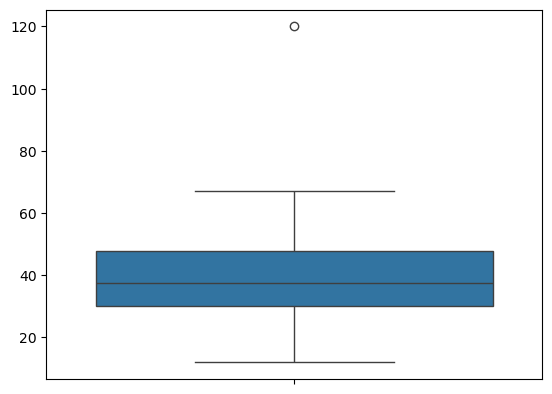

In [9]:
import seaborn as sns
sns.boxplot(ages)

In [11]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [13]:
print(q1,q3)

30.0 47.75


In [15]:
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


Measure Of Dispersion
Variance
Standard Deviation

In [17]:
statistics.variance(ages)

795.2954545454545

In [19]:
np.var(ages,axis=0)

729.0208333333334

In [21]:
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance

In [23]:
variance(ages)

795.2954545454545

In [25]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance

In [27]:
variance(ages,dof=1)

795.2954545454545

In [29]:
statistics.pvariance(ages)

729.0208333333334

In [31]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

Histograms And PDF

<Axes: ylabel='Count'>

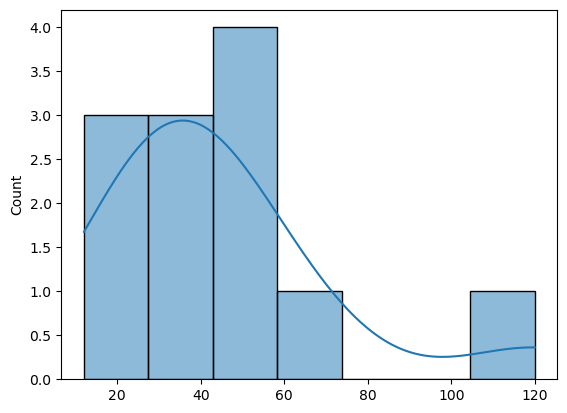

In [33]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [35]:
df=sns.load_dataset('iris')

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

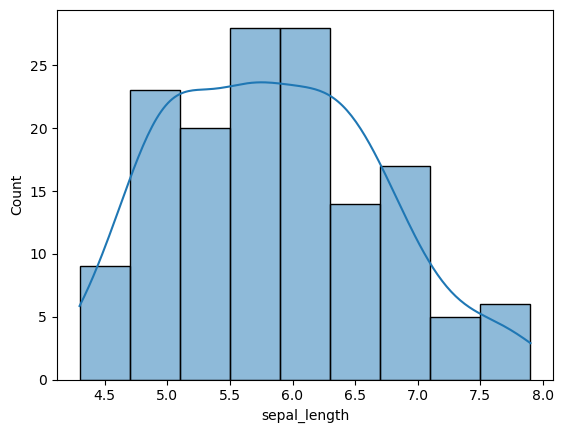

In [39]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

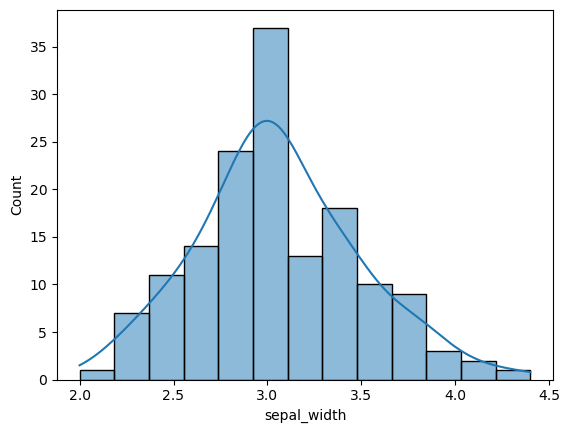

In [41]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

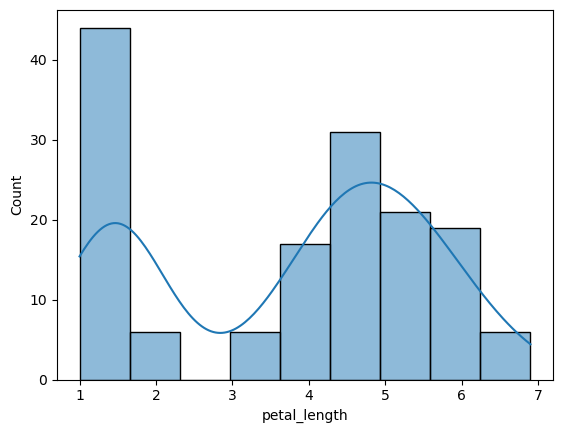

In [43]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

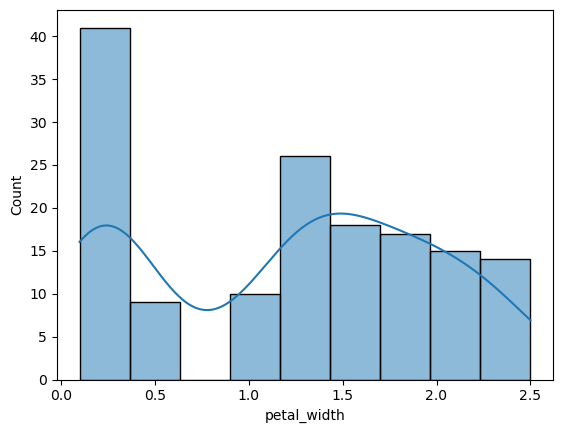

In [45]:
sns.histplot(df['petal_width'],kde=True)

In [47]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)

In [49]:
s

array([ 0.63813005,  0.89666923,  0.49061701,  0.44098454,  0.60246258,
        0.46564852,  0.40030027,  0.78465758,  0.5801249 ,  0.90255912,
        0.76398173,  0.38319976,  0.80767518,  0.55384881,  0.23856363,
        0.60414828,  0.56715118,  0.4354822 ,  0.5870557 ,  0.57062894,
        0.23762803,  0.70894943,  0.48123649,  0.53712973,  0.45460058,
        0.90479946,  0.37811993,  0.70213059,  0.4173422 ,  0.57665014,
        0.5055198 ,  0.21090062,  0.29064566,  0.18607447,  0.39060564,
        0.41674809,  0.53691225,  0.46517956,  0.76964697,  0.61003045,
        0.42801609,  0.34865502,  0.61746551,  0.65436694,  0.27066963,
       -0.11297131,  0.56705307,  0.49342375,  0.27356227,  0.53554818,
        0.48544035,  0.56414316,  0.76551912,  0.03577696,  0.5927012 ,
        0.62612895,  0.71386447,  0.80526047,  0.534526  ,  0.62651398,
        0.84948708,  0.41150374,  0.1639225 ,  0.59176457,  0.54710312,
        0.62862958,  0.51627597,  0.63090628,  0.56903171,  0.55

<Axes: ylabel='Count'>

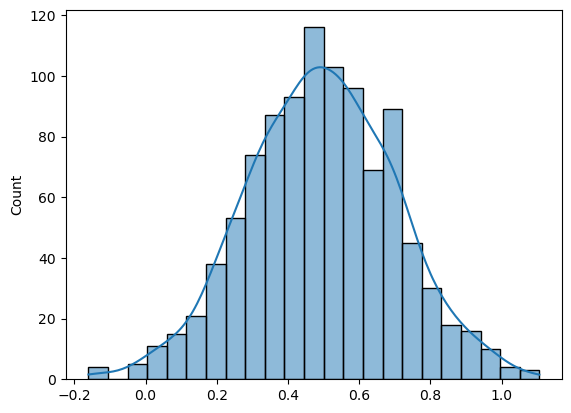

In [51]:
sns.histplot(s,kde=True)

In [53]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

<Axes: ylabel='Count'>

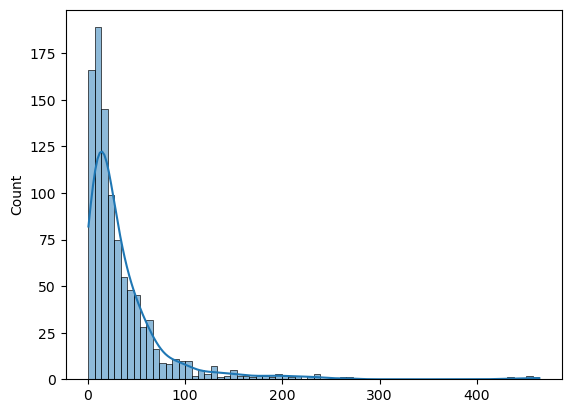

In [55]:
sns.histplot(s,kde=True)

<Axes: ylabel='Count'>

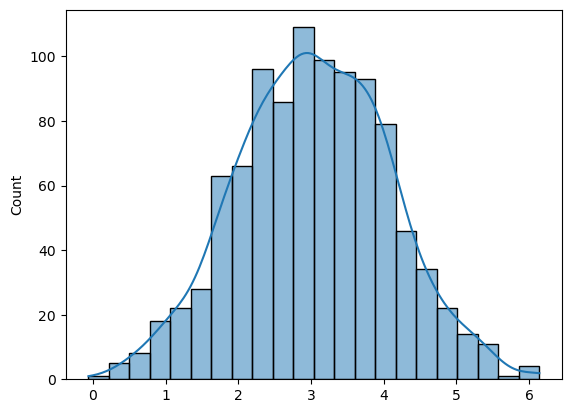

In [57]:
sns.histplot(np.log(s),kde=True)

Check whether Disstribution is Normal Distribution

In [59]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


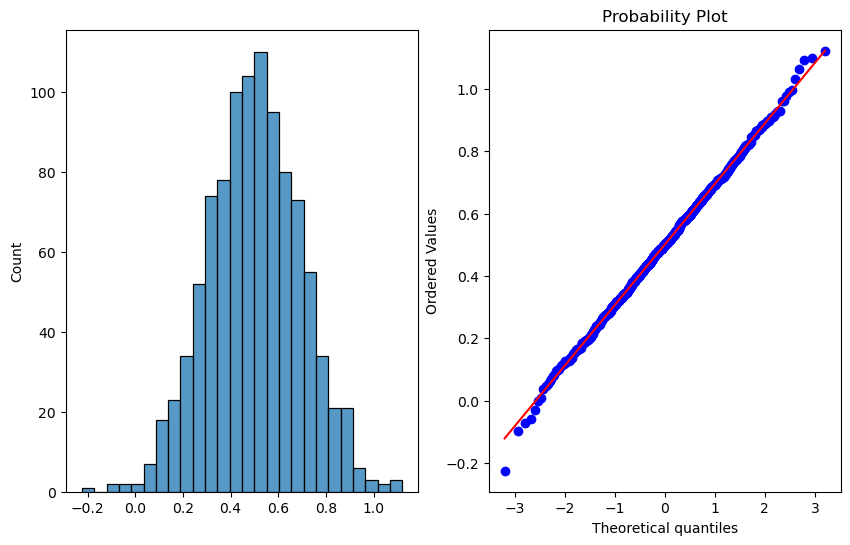

In [61]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

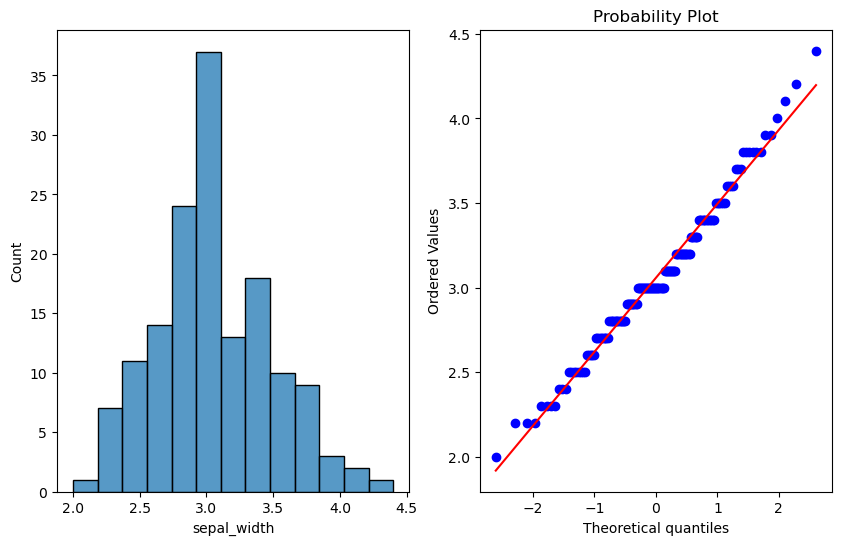

In [63]:
plot_data(df['sepal_width'])

In [65]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [67]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

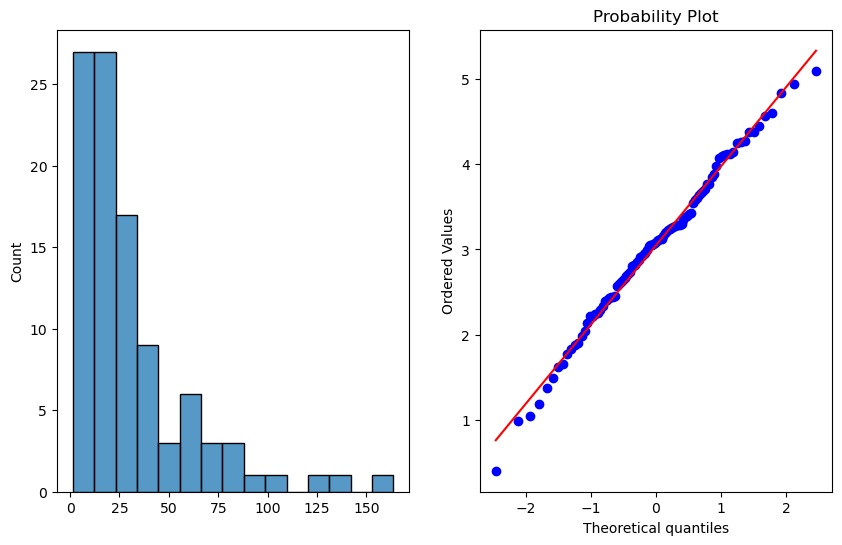

In [69]:
plot_data_log(sample)

Pearson and Sperman Rank Correlation

In [71]:
df=sns.load_dataset('tips')

In [73]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [75]:
import pandas as pd

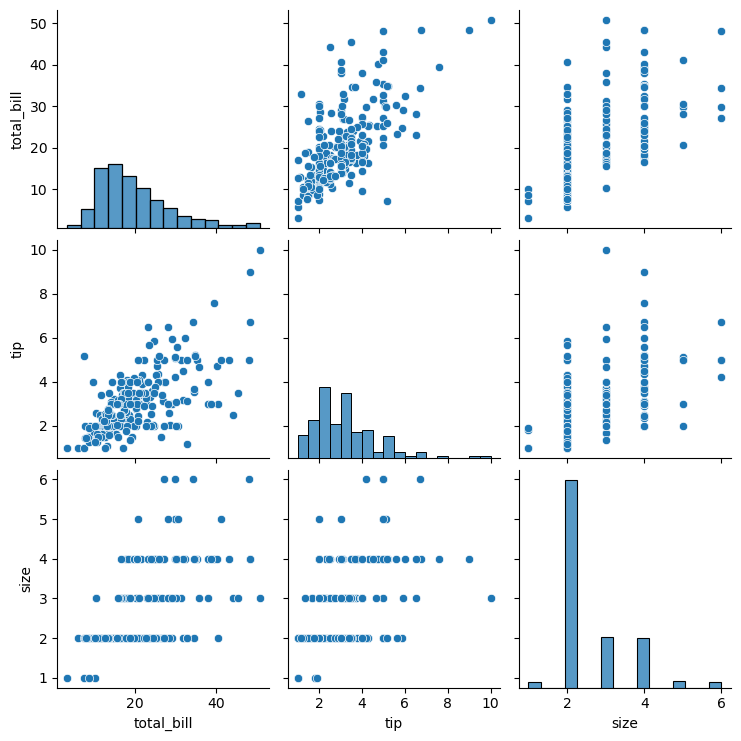

In [82]:
sns.pairplot(df)